# 01 - Introduction to RavenPy

## Before going any further. These notebooks are best visualized by copying them to your writable-workspace on your PAVICS account, as files will be created and written and your writable-workspace has write access. Please copy the tutorial notebooks (01-11) to that folder before continuing.  

## The RavenPy interface to Raven

Welcome to this PAVICS-Hydro tutorial, where we will explore the various hydrological modelling and forecasting possibilities offered by PAVICS. The platform uses the [Raven hydrological modelling framework](http://raven.uwaterloo.ca/) to emulate different hydrological models, and relies on various scientific Python libraries to analyze the results. This tutorial starts by exploring how to run Raven the model itself from Python and access model outputs.


## Basic usage using pre-existing configuration files

To run Raven, we need configuration (`.rv`) files defining hydrological processes, watersheds and meteorological data. If you already have those configuration files ready, this tutorial is for you and shows how to run Raven from a Python programming environment using [RavenPy](https://ravenpy.readthedocs.io/en/latest/). In the next tutorial, we will look at how to build a new raven model from scratch. 

Let's start by importing some utilities that will make our life easier to get data on the servers. If you already have raven model setups, you could simply upload the files here and create your own "config" list.:

In [1]:
from ravenpy.utilities.testdata import get_file

## A note on datasets

For this introduction to RavenPy, we will use pre-existing datasets that are hosted on the PAVICS-Hydro servers. The model is already pre-configured, and the required datasets are pre-built. In the next tutorials, we will see how users can import and use their own datasets to customize the process.

In [2]:
config = [get_file(f"raven-gr4j-cemaneige/raven-gr4j-salmon.{ext}") for ext in ['rvt', 'rvc', 'rvi', 'rvh', 'rvp']]
forcing = get_file("raven-gr4j-cemaneige/Salmon-River-Near-Prince-George_meteo_daily.nc")

# Display the datasets that we will be using
display(tuple(config), forcing)

(PosixPath('/home/david/.raven_testing_data/master/raven-gr4j-cemaneige/raven-gr4j-salmon.rvt'),
 PosixPath('/home/david/.raven_testing_data/master/raven-gr4j-cemaneige/raven-gr4j-salmon.rvc'),
 PosixPath('/home/david/.raven_testing_data/master/raven-gr4j-cemaneige/raven-gr4j-salmon.rvi'),
 PosixPath('/home/david/.raven_testing_data/master/raven-gr4j-cemaneige/raven-gr4j-salmon.rvh'),
 PosixPath('/home/david/.raven_testing_data/master/raven-gr4j-cemaneige/raven-gr4j-salmon.rvp'))

PosixPath('/home/david/.raven_testing_data/master/raven-gr4j-cemaneige/Salmon-River-Near-Prince-George_meteo_daily.nc')

## Building a hydrological model on-the-fly using existing configuration files.

Here we create a Raven model instance, configure it using the pre-defined configuration files and run it by providing the full path to the netCDF driving datasets. The configuration we provide is for a GR4J-CN model emulator that Raven will run for us. We provide the configuration files for GR4J-CN as well as the forcing data (precipitation, temperature, observed streamflow, etc.) that will be used to run the model. We will explore forcing data a little later in a future tutorial.

In [3]:
# Import the Raven model object
from ravenpy.models import Raven

# Create an blank Raven model instance (general, not for a specific emulator)
model = Raven()

# Now configure it so that Raven emulates the model we want from our configuration files. 
model.configure(config)

# Finally, call the model with the forcing data to run it. Later we will see how to also provide other options.
model(forcing)

## Evaluating the model response

That's it! The code above has launched the GR4J model using weather data and the GR4J-CN configuration we provided. There are many other options we could provide, but for now we left everything to the default options to keep things simple. We will explore those in a future tutorial as well.
Now, let's look at the modeled hydrographs. Note that there is a "q_obs" hydrograph, representing the observations we provided ourselves. This is to facilitate the comparison between observations and simulations, and it is not required per se to run the model. The "q_sim" variable is the simulated streamflow and is the one we are interested in.

Note that RavenPy assumes that model outputs are always saved in netCDF format, and relies on [xarray](http://xarray.pydata.org/en/stable/) to access data. 

In [4]:
model.hydrograph

<xarray.Dataset>
Dimensions:     (time: 209, nbasins: 1)
Coordinates:
  * time        (time) datetime64[ns] 1954-01-01 1954-01-02 ... 1954-07-28
    basin_name  (nbasins) object ...
Dimensions without coordinates: nbasins
Data variables:
    precip      (time) float64 ...
    q_sim       (time, nbasins) float64 ...
    q_obs       (time, nbasins) float64 ...
    q_in        (time, nbasins) float64 ...
Attributes:
    Conventions:  CF-1.6
    featureType:  timeSeries
    history:      Created by Raven
    description:  Standard Output

We can visualize the simulated streamflow using xarray's built-in plotting tool, as follows:

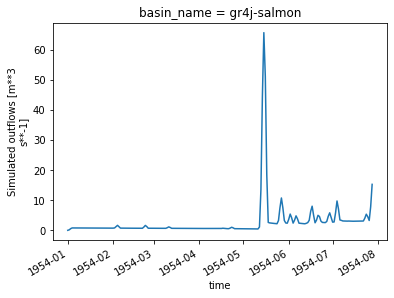

In [5]:
model.q_sim.plot()

Note that we could also extract much more data from the model, including state variables and diagnostics as is typically done with Raven. This will be explored in more detail in a future tutorial, for now, let's just point out that the state variables dataset is accessible via the `storage` attribute. 

In [6]:
model.storage

<xarray.Dataset>
Dimensions:                    (time: 209)
Coordinates:
  * time                       (time) datetime64[ns] 1954-01-01 ... 1954-07-28
Data variables: (12/19)
    rainfall                   (time) float64 ...
    snowfall                   (time) float64 ...
    channel_storage            (time) float64 ...
    reservoir_storage          (time) float64 ...
    rivulet_storage            (time) float64 ...
    Surface Water              (time) float64 ...
    ...                         ...
    Convolution Storage[0]     (time) float64 ...
    Convolution Storage[1]     (time) float64 ...
    total                      (time) float64 ...
    cum_input                  (time) float64 ...
    cum_outflow                (time) float64 ...
    MB_error                   (time) float64 ...
Attributes:
    Conventions:  CF-1.6
    featureType:  timeSeries
    history:      Created by Raven
    description:  Standard Output